1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [ ]:
!pip install mixed-naive-bayes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mixed_naive_bayes import MixedNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
PATH = "/content/drive/MyDrive/Introduction to ML/Week 03/TravelInsurancePrediction.csv" # Path to your file

df = read_dataset(PATH)

#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
print("Quantitative columns \n")
print(df.describe())
print()
print("Qualitative columns \n")
print(df.describe(include=[object]))

Quantitative columns 

        Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  

Qualitative columns 


In [ ]:
print('Quantitative columns:')
numeric_col = df.describe().columns
print(numeric_col, '\n')

print('Qualitative columns:')
categorical_col = df.describe(include=[object]).columns
print(categorical_col)

Quantitative columns:
Index(['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object') 

Qualitative columns:
Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'FamilyMembers'}>],
       [<Axes: title={'center': 'ChronicDiseases'}>,
        <Axes: title={'center': 'TravelInsurance'}>]], dtype=object)

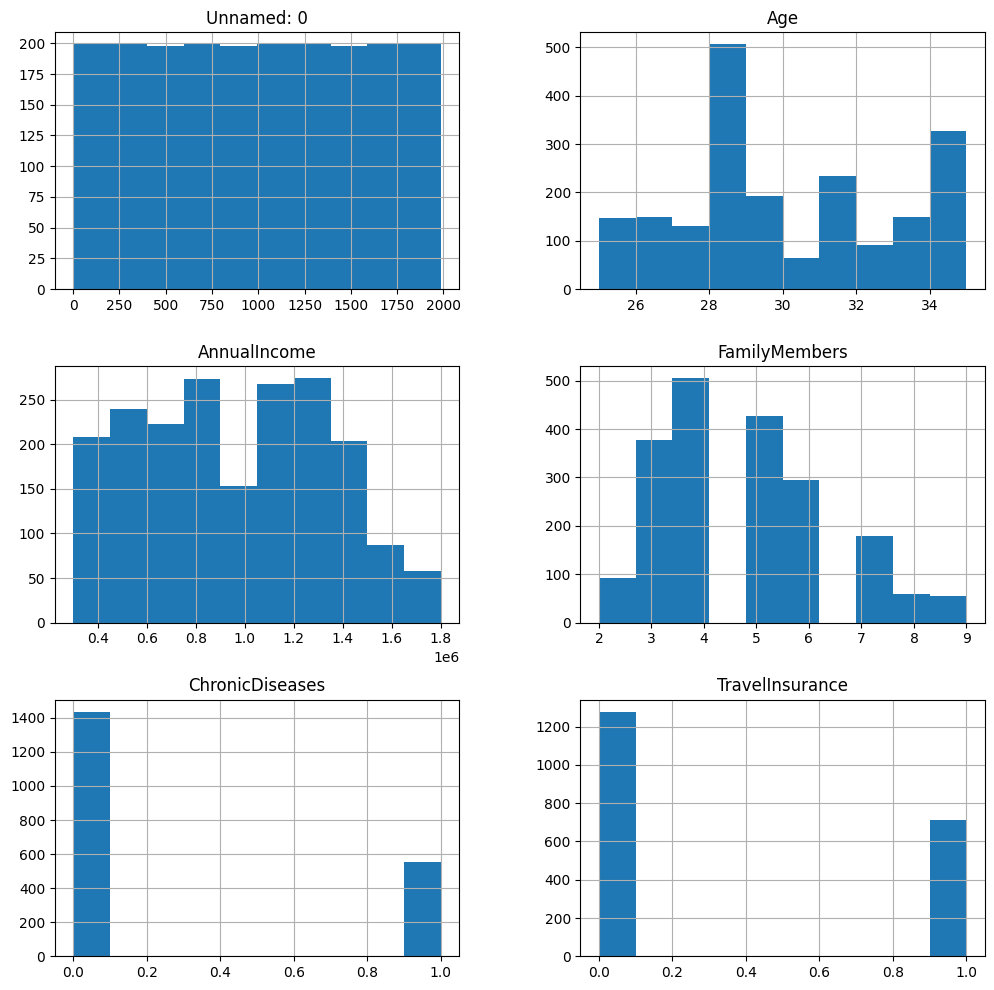

In [ ]:
df.hist(column=numeric_col, figsize=(12,12))

We may find the column 'unamed 0' is just like an index column so we need to remove it 

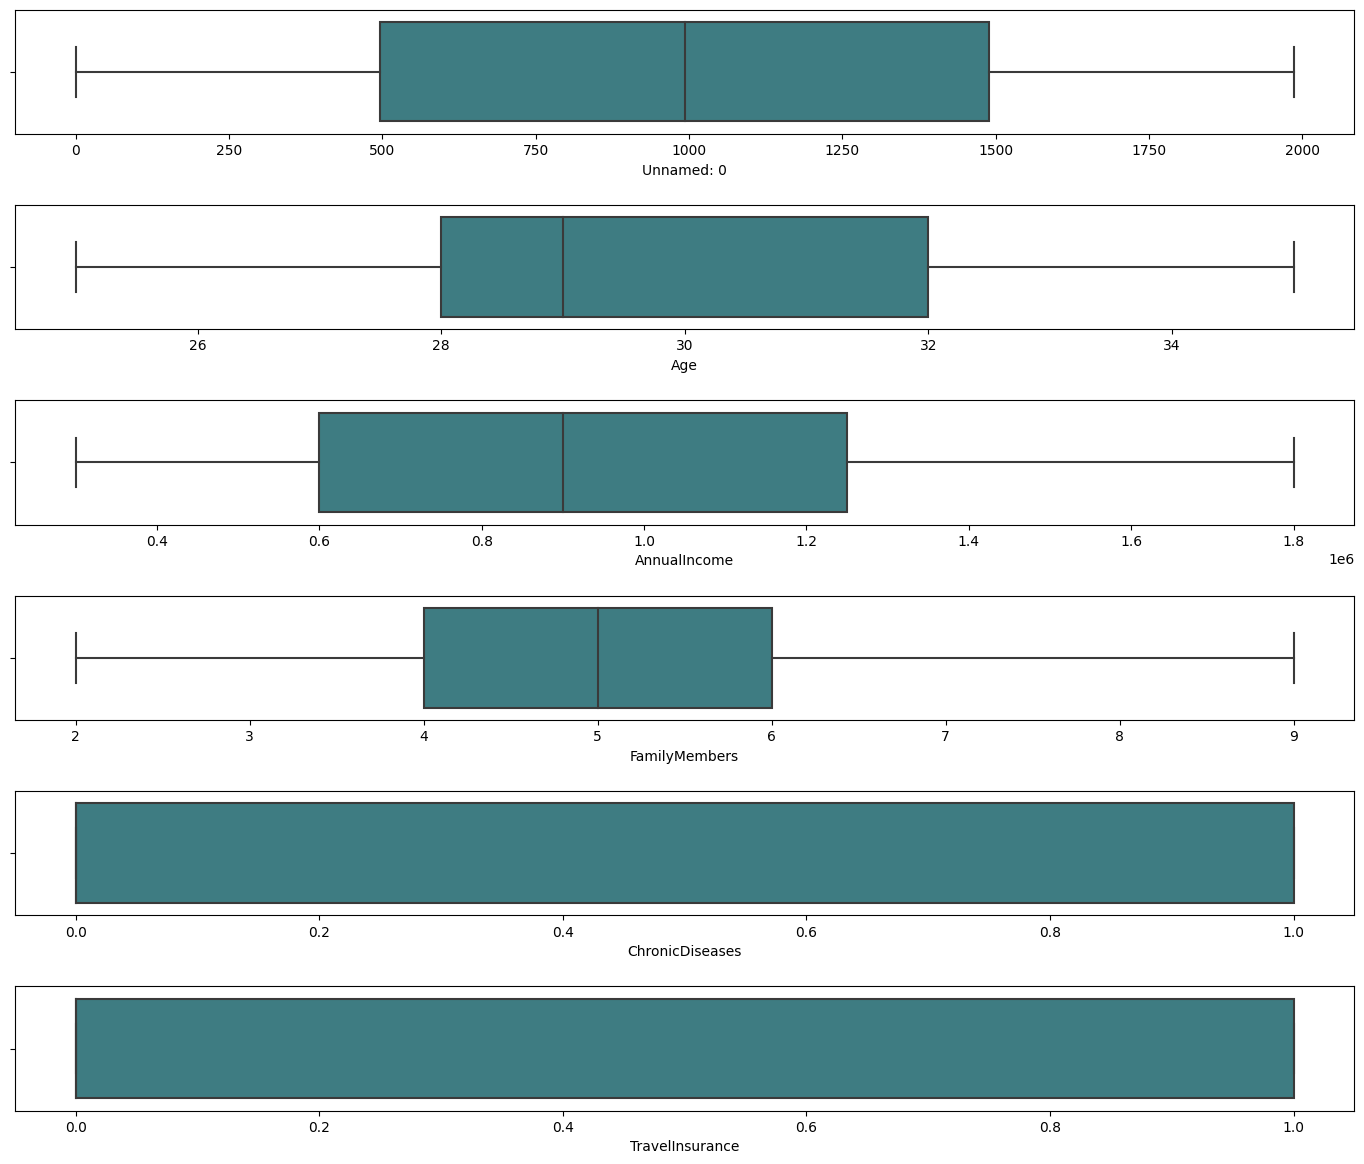

In [ ]:
fig, axes = plt.subplots(len(numeric_col), 1, figsize=(14, 2*len(numeric_col)), sharex=False, sharey=False)

for i, column in enumerate(numeric_col):
  sns.boxplot(x=column, data=df, palette='crest', ax=axes[i])
plt.tight_layout(pad=2.0)

<Axes: xlabel='ChronicDiseases', ylabel='Count'>

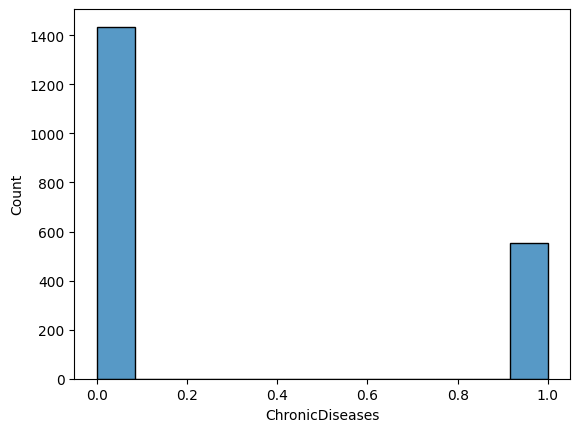

In [ ]:
sns.histplot(x='ChronicDiseases', data=df)

<Axes: xlabel='TravelInsurance', ylabel='Count'>

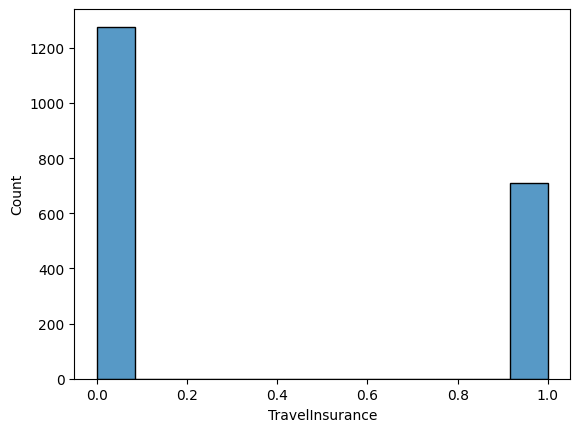

In [ ]:
sns.histplot(x='TravelInsurance', data=df)

<ipython-input-12-3857f0723db1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

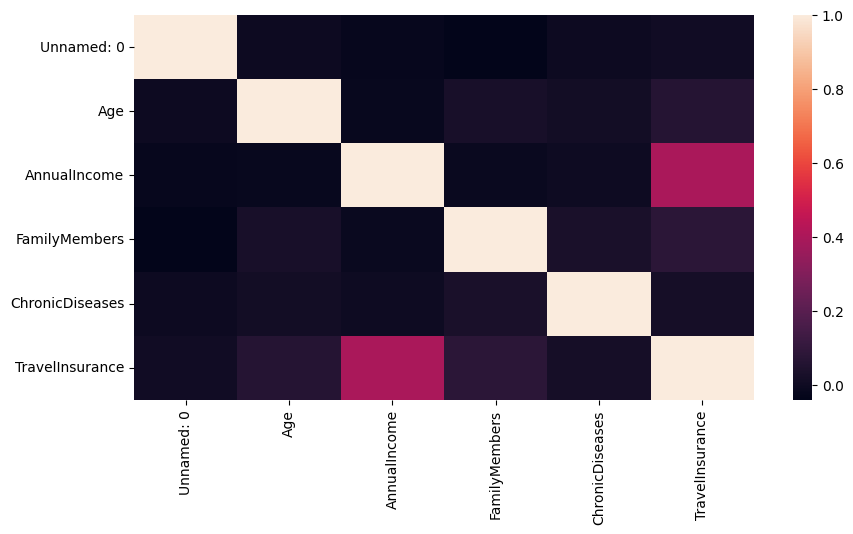

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr())

## Preprocessing

In [ ]:
#check if there is any null data
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop('Unnamed: 0', axis='columns', inplace=True)
    return df

In [ ]:
df = preprocessing_data(df.copy())

In [ ]:
Xdf = df.copy()
Xdf = Xdf.drop(['TravelInsurance'], axis=1)
Xdf

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No
...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes


In [ ]:
numerical_indexes = [Xdf.columns.get_loc(char) for char in Xdf.select_dtypes(exclude=[object]).columns.to_list() if char in Xdf]
continuous_indexes = [Xdf.columns.get_loc(c) for c in ['Age', 'AnnualIncome']]
categorical_index = [Xdf.columns.get_loc(char) for char in Xdf.select_dtypes(include=[object]).columns.to_list() if char in Xdf]
print(numerical_indexes)

[0, 3, 4, 5]


## Feature Engineering

<Axes: >

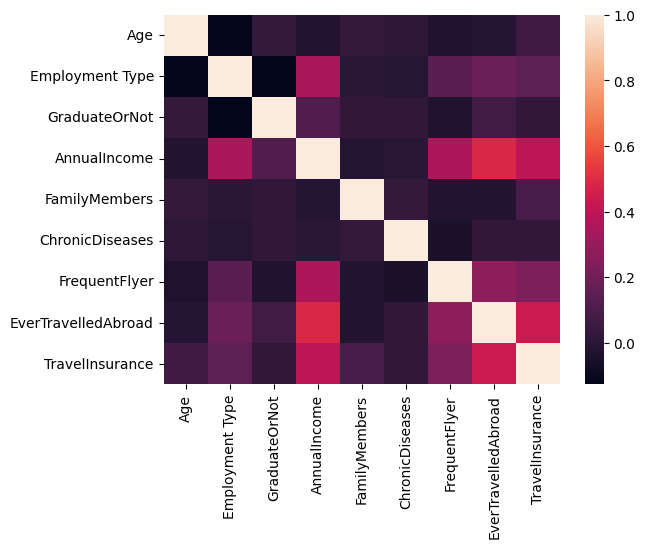

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df['EverTravelledAbroad']=df['EverTravelledAbroad'].astype("category").cat.codes
    df['Employment Type'] = df['Employment Type'].astype("category").cat.codes
    df['GraduateOrNot'] = df['GraduateOrNot'].astype("category").cat.codes
    df['FrequentFlyer'] = df['FrequentFlyer'].astype("category").cat.codes
    
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes

    # feature = df.columns.tolist()
    # feature.remove("TravelInsurance")

    # X = df[feature].values # Todo: Select features
    # y = df.TravelInsurance.values # Todo: Select label

    X = df.drop(['TravelInsurance'], axis=1)
    y = df['TravelInsurance']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, stratify=y)

## Build SK-learn model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

def buildNoScaler(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Todo: Input your scaler and logistic model into pipeline
    NBmodel = GaussianNB()
    NBmodel.fit(trainX, trainY.ravel())
    # Todo: fit your model with X, y
    return NBmodel

model = buildNoScaler(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)

print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       384
           1       0.71      0.51      0.60       213

    accuracy                           0.75       597
   macro avg       0.74      0.70      0.71       597
weighted avg       0.75      0.75      0.74       597



In [ ]:
#Build Gaussian Naive Bayes with Scaler
def buildGauScaler(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline([('scaler', MinMaxScaler()), ('model', GaussianNB())])

    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'model__var_smoothing': np.logspace(0, -9, 100),
    }
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X, y)
    return grid


def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
   # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print("\n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

gauss_model = buildGauScaler(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % gauss_model.best_score_)
print(gauss_model.best_params_)
# Compare on training dataset
predictX = gauss_model.predict(testX)
calculate_performance(testY, predictX)

Best parameter (CV score=0.745):
{'model__var_smoothing': 0.3511191734215131, 'scaler__feature_range': (-1, 1)}
precision 0.8115942028985508
recall 0.5258215962441315
accuracy 0.7872696817420436
F1 0.6381766381766382

               precision    recall  f1-score   support

           0       0.78      0.93      0.85       384
           1       0.81      0.53      0.64       213

    accuracy                           0.79       597
   macro avg       0.80      0.73      0.74       597
weighted avg       0.79      0.79      0.77       597



0.6381766381766382

In [ ]:
class MixedNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, categorical_features, var_smoothing=1e-9):
        self.categorical_features = categorical_features
        self.var_smoothing = var_smoothing
        self.model = MixedNB(categorical_features = self.categorical_features, var_smoothing=self.var_smoothing)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        y_pred = self.model.predict(X)
        return y_pred

In [ ]:
#Take the column index of the data frame to use in column transformer and mixed naive bayes
numerical_ix = X.select_dtypes(exclude=['object']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
continuous_ix = ['Age', 'AnnualIncome']
print(numerical_ix)
print(continuous_ix)

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')
['Age', 'AnnualIncome']


In [ ]:
#Normalizer
# normalizer = MinMaxScaler()
# trainX = normalizer.fit_transform(trainX)
# testX = normalizer.transform(testX)
#var_smoothing_values = np.logspace(-4, -9, num=100)

def buildMixedNaiveBayes(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Todo: Input your scaler and logistic model into pipeline

    column_transformer = ColumnTransformer([("log", FunctionTransformer(np.log1p), continuous_ix), ("scaler", StandardScaler(), numerical_ix)], remainder="passthrough")
    pipe = Pipeline([('transformer', column_transformer), ('pca', PCA()), ('model', MixedNaiveBayes(categorical_features=categorical_ix))])

    param_grid = {
        'pca__n_components': np.arange(2, 10),
        'model__var_smoothing': np.logspace(0, -9, 100),
    }
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X, y)
    return grid



def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
   # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print("\n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

mixed_model = buildMixedNaiveBayes(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % mixed_model.best_score_)
print(mixed_model.best_params_)
# Compare on training dataset
predictX = mixed_model.predict(testX)
calculate_performance(testY, predictX)

Best parameter (CV score=0.753):
{'model__var_smoothing': 1.0, 'pca__n_components': 6}
precision 0.9411764705882353
recall 0.3004694835680751
accuracy 0.7437185929648241
F1 0.4555160142348754

               precision    recall  f1-score   support

           0       0.72      0.99      0.83       384
           1       0.94      0.30      0.46       213

    accuracy                           0.74       597
   macro avg       0.83      0.65      0.64       597
weighted avg       0.80      0.74      0.70       597



0.4555160142348754

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. I chose f1_score for the main score since the f1 score metric computes how many times a model made a correct prediction across the entire dataset" \
           "The model I used are Gaussian Naive Bayes model with Standard Scaler and Mixed Naive Bayes model with Standard Scaler and PCA dimensional reduction" \
           "As a result, the Mixed Naive Bayes has the better precision than the Gaussian Naive Bayes, but the f1_score and accuracy score of MixedNB is much less than GaussianNB."

get_conclusion()

'7. I chose f1_score for the main score since the f1 score metric computes how many times a model made a correct prediction across the entire datasetThe model I used are Gaussian Naive Bayes model with Standard Scaler and Mixed Naive Bayes model with Standard Scaler and PCA dimensional reductionAs a result, the Mixed Naive Bayes has the better precision than the Gaussian Naive Bayes, but the f1_score and accuracy score of MixedNB is much less than GaussianNB.'